# Clean up the mol2 file 
<b style="font-size:20px">With xxxxxx.mol2 as input:<br>
It automatically outputs the xxxxxx_clean.mol2 and xxxxxx.sdf;</b>
<br>
<code><b style="font-size:20px">molfile = "./PaIVKLkS/PaIVKLkS_SEEDdock.mol2"  # absolute path</b>
<b style="color:green;font-size:20px">Doana.utils.clean_mol2(molfile)</b></code>

In [2]:
import Doana 
# absolute path
molfile = "/home/miemie/Downloads/vina_V00196B6dm9a/all_mols.mol2" 
Doana.utils.clean_mol2(molfile)


Running the clean mol2 file function


*** Open Babel Error  in TetStereoToWedgeHash
  Failed to set stereochemistry as unable to find an available bond


Found the sdf output;


571 molecules converted


'/home/miemie/Downloads/vina_V00196B6dm9a/all_mols.sdf'

<h1>PLIF Generator</h1>

In [3]:
# import Doana
from Doana import analysis

parmdic = {
  'reflig'     : "/home/miemie/Downloads/vina_V00196B6dm9a/tmp_Sampling_target.mol2",
  'profile'    : "/home/miemie/Downloads/vina_V00196B6dm9a/tmp_Sampling_target.pdb",
  
  'resultmols' : "/home/miemie/Downloads/vina_V00196B6dm9a/all_mols.sdf",
  'resultdat'  : "/home/miemie/Downloads/vina_V00196B6dm9a/all_scores.dat",
  # This should be a new file, new execution will overwrite is file
  'outpkl'     : "/home/miemie/Downloads/vina_V00196B6dm9a/all_mols.pkl",  

  # Should use a python iterable object to define its indexes 
  'onlymols'   : "",
  'type': "vina"
}

# Calculate the overlapping index separately. 
wrapper = analysis.PLIFGen_Dock(parmdic)
# Generate main PLIF
wrapper.gen() 

# Generate extra calculations 
OIdic = wrapper.calc_OI(1.5, printrecords=False)
wrapper.savedata()


Loading receptor PDB structure: /home/miemie/Downloads/vina_V00196B6dm9a/tmp_Sampling_target.pdb


/home/miemie/miniconda3/envs/prolif/lib/python3.7/site-packages/MDAnalysis/topology/PDBParser.py:315: UserWarning: Element information is missing, elements attribute will not be populated. If needed these can be guessed using MDAnalysis.topology.guessers.
  warnings.warn("Element information is missing, elements attribute "


  0%|          | 0/1 [00:00<?, ?it/s]

Reference ligand interactions: ligand             UNL1                                              \
protein         ILE38.B     GLY39.B             MET97.B    LEU115.B   
interaction Hydrophobic Hydrophobic HBDonor Hydrophobic Hydrophobic   
Frame                                                                 
0                  True        True    True        True        True   

ligand                                                               \
protein        PHE116.B    PRO117.B    ASP118.B            ILE126.C   
interaction Hydrophobic Hydrophobic Hydrophobic HBDonor Hydrophobic   
Frame                                                                 
0                  True        True        True    True        True   

ligand                           
protein        GLU191.C          
interaction Hydrophobic HBDonor  
Frame                            
0                  True    True  
Successfully loaded the reference ligand 
Will input all molecules
571 molecules put to

  0%|          | 0/571 [00:00<?, ?it/s]

  0%|          | 0/571 [00:00<?, ?it/s]

Saved the fingerprint to file: /home/miemie/Downloads/vina_V00196B6dm9a/all_mols.pkl


In [ ]:
print(dir())

<h1>PLIF Reader</h1>

Data set 1
0 ILE38.B_HBDonor 3  | 1 GLY39.B_HBDonor 54  | 2 CYS40.B_HBDonor 3
3 GLY41.B_HBDonor 1  | 4 TYR42.B_HBAcceptor 8  | 5 TYR42.B_PiStacking 67
6 GLY44.B_HBAcceptor 1  | 7 LEU61.B_HBDonor 1  | 8 GLU62.B_HBDonor 25
9 GLU62.B_Cationic 85  | 10 ILE63.B_HBDonor 3  | 11 ILE63.B_HBAcceptor 26
12 ARG64.B_HBAcceptor 11  | 13 SER94.B_HBDonor 2  | 14 ASN95.B_HBDonor 2
15 ALA96.B_HBDonor 3  | 16 ALA96.B_HBAcceptor 22  | 17 MET97.B_HBAcceptor 10
18 PHE114.B_PiStacking 7  | 19 LEU115.B_HBDonor 56  | 20 PHE116.B_HBDonor 18
21 ASP118.B_HBDonor 10  | 22 ASP118.B_HBAcceptor 52  | 23 ASP118.B_Cationic 1
24 HID120.B_HBDonor 2  | 25 HID120.B_PiStacking 1  | 26 PHE121.B_HBDonor 4
27 TRP124.C_HBDonor 8  | 28 ILE126.C_HBAcceptor 7  | 29 THR189.C_HBDonor 8
30 GLU190.C_HBDonor 1  | 31 GLU190.C_HBAcceptor 3  | 32 GLU191.C_HBDonor 13
33 GLU191.C_HBAcceptor 68  | 34 GLU191.C_Cationic 128  | 35 Rank	 571
36 vina_total	 571  | 37 vina_inter	 571  | 38 vina_intra	 571
39 vina_torsion	 571  | 40 pos_id	 571  |

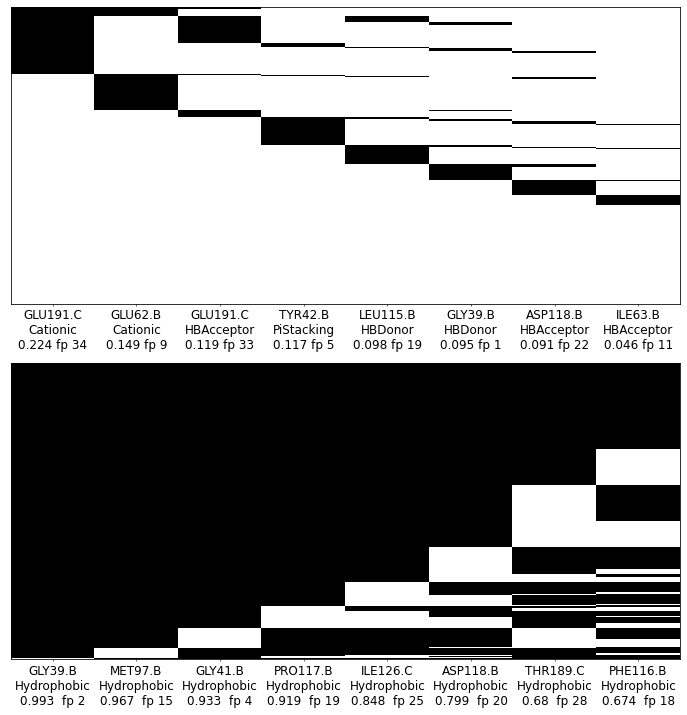

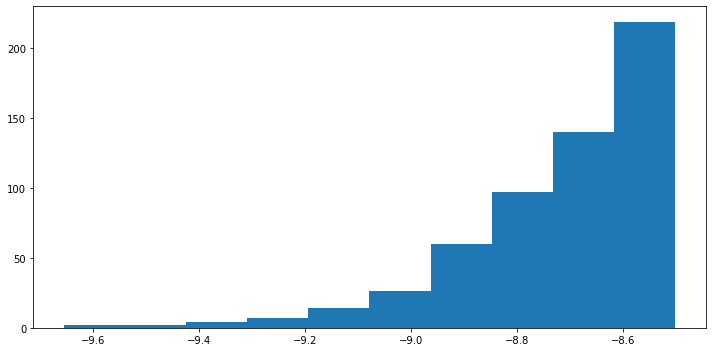

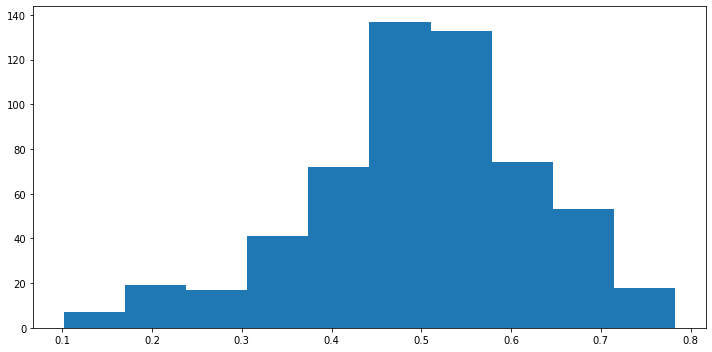

In [5]:
from Doana import analysis
pklfile = "/home/miemie/Downloads/vina_V00196B6dm9a/all_mols.pkl"
reader = analysis.PLIFRead_Dock(pklfile)
fig, ax  = reader.Docking_prolif(sel_cols="top")

reader.show_cols()
fig2, ax2, his_N, his_bins, hist_patches = reader.drawHist(reader.fpdata, -10)
fig2, ax2, his_N, his_bins, hist_patches = reader.drawHist(reader.fpdata, -3)


# Filter poses 

In [7]:
# Date selection reader.fpdata non-hydrophobic interactions, reader.fpdata2 hydrophobic interactions
datasel = reader.fpdata

# Setup the column indexes
score_column = len(datasel.columns)-10; 
seed_vdw_column = len(datasel.columns)-9; 
rank_column = len(datasel.columns)-11; 
OI_avg_column    = len(datasel.columns)-3; 
OI_ref_column    = len(datasel.columns)-2; 
print(f"Selected columns: {rank_column} {datasel.columns[rank_column][0]}, {seed_vdw_column} {datasel.columns[seed_vdw_column][0]}, {OI_ref_column} {datasel.columns[OI_ref_column][0]}")

# Apply filters 
HBstate  = reader.HBondFilter("ge", 1); 
Sstate   = reader.colFilter(reader.fpdata, score_column, "lt", -20); 
Rstate   = reader.colFilter(reader.fpdata, rank_column, "lt", 1000); 
OIstate  = reader.colFilter(reader.fpdata, OI_ref_column, "gt", 0.7); 
FPstate  = reader.FPSelectionFilter(reader.fpdata, [0,13,11], operator="or"); 

# Combine different filters
filters_states  = [HBstate, Sstate, Rstate, OIstate, FPstate]; 

intersec = reader.getIntersection(*filters_states); 
posids   = reader.getPOSIDByStatus(intersec); 
reader.getPOSIDQuery(posids); 
# print(posids)

Selected columns: 31 Rank, 33 seed_vdw, 40 OI_ref
Hydrogen Bond Count Selector: 1988 poses are kept
Column Value Selector: 1302 poses are kept
Column Value Selector: 998 poses are kept
Column Value Selector: 563 poses are kept
Fingerprint Selector: Using and operator, the poses are kept if they have any of defined fingerprint.
Fingerprint Selector: 1743 poses are kept
Intersection Operator: Source from 5 datasets, 184 poses are kept


'pos_id in (10174248,10188195,10161910,10154061,10152731,10202830,10150146,10196911,10186711,10197634,10167036,10152297,10150500,10202436,10188610,10194310,10204207,10189330,10186064,10163020,10190585,10187075,10157767,10172284,10202836,10187606,10201522,10157275,10155546,10166850,10167983,10176004,10167234,10204129,10195413,10208038,10169423,10178341,10180217,10152710,10164730,10176940,10162304,10182714,10177663,10182373,10175944,10204957,10202374,10182509,10161800,10163570,10185513,10157625,10197438,10167032,10207936,10173903,10170427,10194773,10194793,10168231,10204585,10207961,10184470,10182214,10205067,10207794,10164376,10204770,10208464,10191660,10156576,10155496,10208233,10175621,10193806,10206821,10175847,10207235,10162929,10163195,10159680,10172969,10173119,10200319,10186796,10172434,10174879,10183313,10157870,10153714,10184213,10159063,10176888,10170419,10170768,10200164,10157375,10182103,10200080,10171815,10155931,10169959,10192372,10202780,10200297,10188133,10183246,1015023